# Introdução

Essa é uma rápida introdução a tecnologia de vídeo para pessoas desenvolvedoras de software. Entretanto, queremos que esse documento seja fácil o suficiente **para qualquer pessoa aprender**. A idéia nasceu de uma [pequena oficina para pessoas interessadas em tecnologia de vídeo](https://docs.google.com/presentation/d/17Z31kEkl_NGJ0M66reqr9_uTG6tI5EDDVXpdPKVuIrs/edit#slide=id.p).

O objetivo principal do documento é introduzir alguns conceitos de vídeo digital utilizando um **vocabulário simples, elementos visuais e exemplos práticos**. Além disso, gostaríamos que esse conhecimento estivesse disponível em qualquer lugar. Por favor, fique à vontade para enviar correções, sugestões e melhorias.

# Terminologia Básica

Uma **imagem** podem ser pensada como uma **matriz 2d**. Se nós começamos a pensar sobre **cores**, podemos extrapolar essa idéia inicial e ver essa imagem como uma **matriz 3d** onde as **dimensões adicionais** são utilizadas para armazenar **informações de cor**.

Se escolhemos representar essas cores com [cores primárias (vermelho, verde and azul)](https://pt.wikipedia.org/wiki/Cor_prim%C3%A1ria), podemos definir três planos: o primeiro plano para o **vermelho**, o segundo para o **verde** e o último para a cor **azul**.

![uma imagem é uma matriz 3D RGB](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/image_3d_matrix_rgb.png "Uma imagem é uma matriz 3D")

Iremos chamar cada ponto nessa matriz de **um pixel** (picture element). Um pixel representa a **intensidade** (geralmente um valor numérico) de uma dada cor. Por exemplo, um **pixel vermelho** significa 0 de verde, 0 de azul e o máximo de vermelho. O **pixel cor rosa** pode ser formado a partir de uma combinação de três cores. Usando uma representação numérica de 0 até 255, onde o pixel rosa é definido por **Vermelho=255, Verde=192 e Azul=203**.

> #### Outras maneiras de codificar uma imagem colorida
> Muitos outros possíveis modelos podem ser utilizados para representar uma imagem colorida. Nós podemos, por exemplo, utilizar uma paleta indexada de cores, onde um único byte representa cada pixel, ao invés de três bytes quando utilizando o modelo RGB. Em um modelo como esse, podemos utilizar uma matriz 2D ao invés de uma matriz 3D para representar cor. Dessa maneira, nós iremos salvar memória mas teremos potencialmente menos opções de cores.
>
> ![paleta do NES](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/nes-color-palette.png "Paleta de cores do NES")

Por exemplo, olhe para a figura abaixo. O primeiro rosto ali é totalmente colorido. Os outros rostos são planos vermelho, verde e azul (mostrados em tons de cinza).

![Intensidade de canais de cores RGB](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/rgb_channels_intensity.png "Intensidade de canais de cores RGB")

Nós podemos ver que a **cor vermelha** será a cor que **contribuíra mais** (as partes mais brilhantes no segundo rosto) para a cor final, enquanto que a contribuição da **cor azul** pode ser vista **mais concentrada nos olhos do Mário** (último rosto) e em algumas partes de suas roupas. Perceba como **todos os planos de cores** (partes escuras) contribuem menos para o **bigode do Mário**.

Cada intensidade de cor requer um determinada quantidade de bits, essa quantidade é chamada de **profundidade de bit**. Digamos que vamos gastar **8 bits** (tendo como valores válidos 0 até 255) por cor (plano), dessa forma, nós temos uma **profundidade de cor** de **24 bits** (8 bits vezes 3 planos RGB). Também podemos inferir que podemos utilizar 2 na 24 (2^24) diferentes cores.

> **É ótimo** para aprender [como uma imagem se transforma em bits](http://www.cambridgeincolour.com/tutorials/camera-sensors.htm).

Uma outra propriedade de uma imagem é a **resolução**, que é basicamente o número de pixels em uma dimensão. É geralmente representada por altura x largura, por exemplo: a imagem **4x4** abaixo:

![resolução da imagem](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/resolution.png "resolução da imagem")

>
> #### Prática 1: brincando com imagens e cores
>

> **1.** Você pode brincar com imagens e cores utilizando python, numpy, matplotlib, etc. Na primeira atividade dessa prática, vamos interpretar como uma imagem pode ser visualizada como uma matriz 3D com os valores dos pixels, inclusive os canais que formam essa imagem.
a partir do código abaixo, obtenha as matrizes da cada canal de cor da imagem original e plote-as usando matplotlib.

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

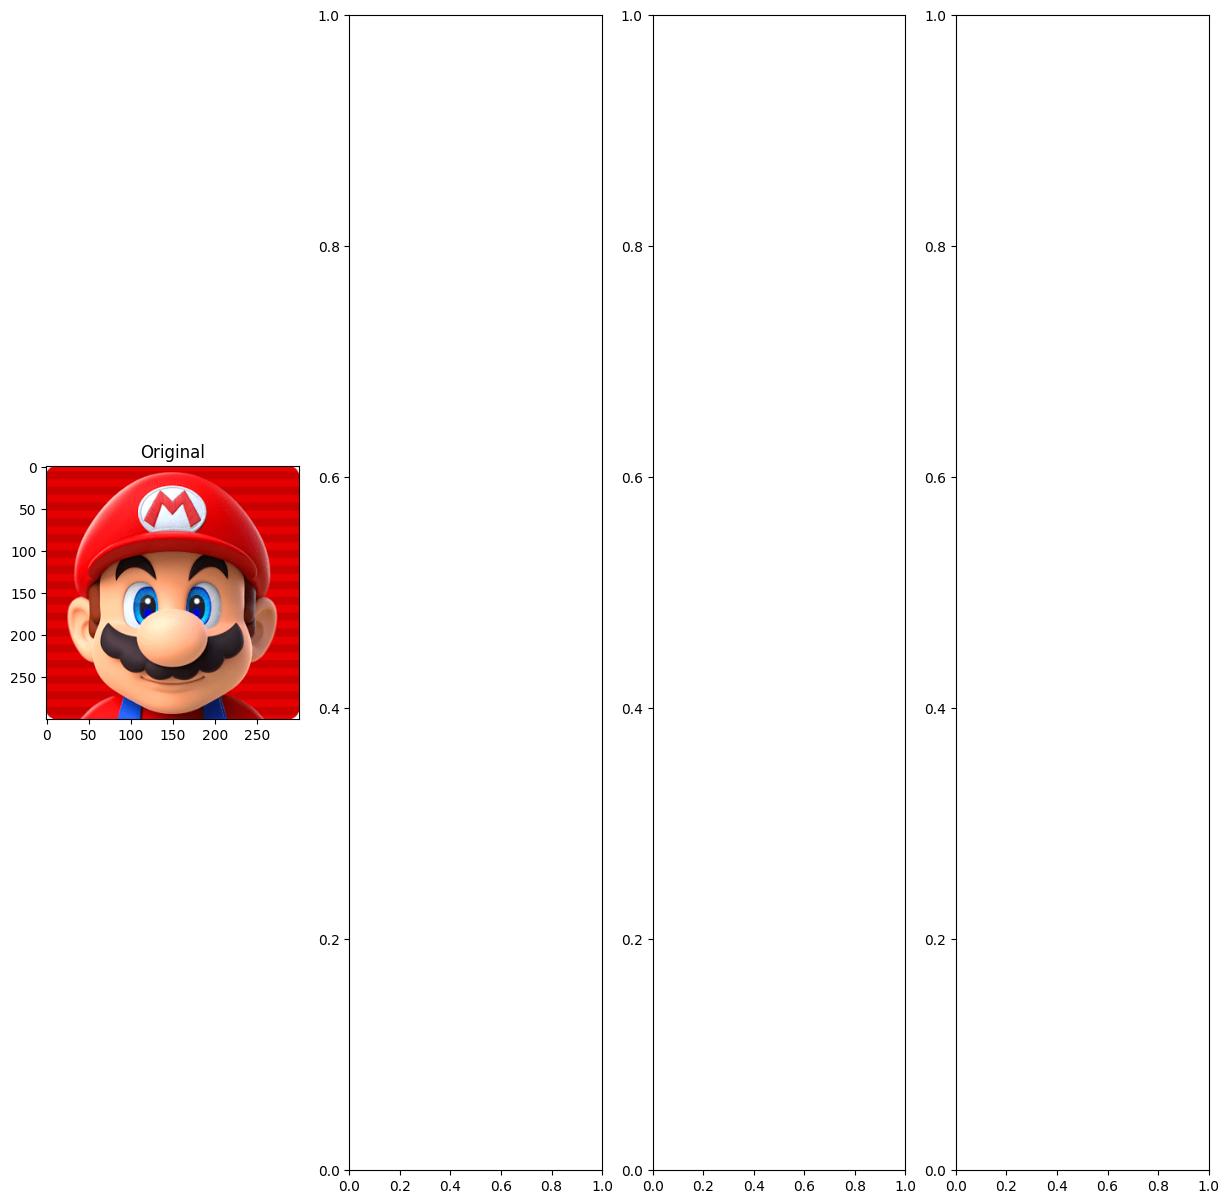

In [27]:
import urllib.request

# Download the image from the URL
url = 'https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/super_mario_head.png'
urllib.request.urlretrieve(url, 'super_mario_head.png')

# Load the image using mpimg.imread()
img = mpimg.imread('super_mario_head.png')

# Create subplots of 15x15
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(15, 15))

# Insert the code to visualize each RGB color channel
plt1.set_title('Original')
plt1.imshow(img)




> __2.__ Qual a resolução da imagem original carregada acima? Essa resolução muda em cada canal? Plote pelo menos três _zoom_ da imagem original, descando algum ponto de transição da imagem (borda).

Resolution of the original image: (300, 300)


ValueError: zero-size array to reduction operation minimum which has no identity

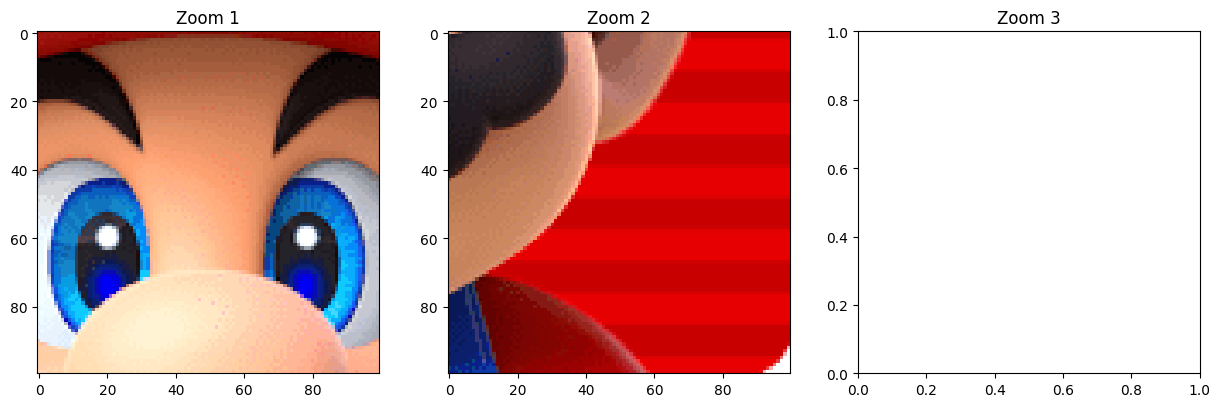

In [34]:
# Determine the resolution of the original image
resolution = img.shape[:2]
print("Resolution of the original image:", resolution)

# Plot three zoomed-in images
zoom1 = img[100:200, 100:200]
zoom2 = img[200:300, 200:300]
zoom3 = img[300:400, 300:400]

f, (plt1, plt2, plt3) = plt.subplots(1, 3, figsize=(15, 15))

plt1.set_title('Zoom 1')
plt1.imshow(zoom1)

plt2.set_title('Zoom 2')
plt2.imshow(zoom2)

plt3.set_title('Zoom 3')
plt3.imshow(zoom3)

plt.show()



>
> __3.__ Filtros podem ser usados para suavizar essa transição observada na tarefa 2 dessa prática. Basicamente, filtros são usados para detecção de bordas, suavização de transições, e inserção de efeitos na imagem, basicamente realizando a convolução da imagem desejada com um kernel que gera o efeito desejado. Considerando a função `convolve` do submódulo `ndimage` da biblioteca Scipy, aplique todos os três kernels mostrados a seguir nos três _zoom_ gerado na tarefa 2 e comente os resultados obtidos.

In [ ]:
from scipy.ndimage import convolve

In [ ]:
kernel_1 = np.array([[-1.,-1.,-1.],
                     [-1.,8.,-1.],
                     [-1.,-1.,-1.]])

kernel_2 = np.array([[-1.,-1.,-1.],
                     [-1.,9.,-1.],
                     [-1.,-1.,-1.]])

kernel_3 = np.array([[1.,1.,1.],
                     [1.,1.,1.],
                     [1.,1.,1.]])

In [36]:
from scipy.ndimage import convolve

# Apply the convolution filters to the zoomed images
filtered_zoom1_1 = convolve(zoom1, kernel_1)
filtered_zoom1_2 = convolve(zoom1, kernel_2)
filtered_zoom1_3 = convolve(zoom1, kernel_3)

filtered_zoom2_1 = convolve(zoom2, kernel_1)
filtered_zoom2_2 = convolve(zoom2, kernel_2)
filtered_zoom2_3 = convolve(zoom2, kernel_3)

filtered_zoom3_1 = convolve(zoom3, kernel_1)
filtered_zoom3_2 = convolve(zoom3, kernel_2)
filtered_zoom3_3 = convolve(zoom3, kernel_3)

# Comment on the results
print("Results for Zoom 1:")
print("Filtered with Kernel 1:")
print(filtered_zoom1_1)
print("Filtered with Kernel 2:")
print(filtered_zoom1_2)
print("Filtered with Kernel 3:")
print(filtered_zoom1_3)

print("Results for Zoom 2:")
print("Filtered with Kernel 1:")
print(filtered_zoom2_1)
print("Filtered with Kernel 2:")
print(filtered_zoom2_2)
print("Filtered with Kernel 3:")
print(filtered_zoom2_3)

print("Results for Zoom 3:")
print("Filtered with Kernel 1:")
print(filtered_zoom3_1)
print("Filtered with Kernel 2:")
print(filtered_zoom3_2)
print("Filtered with Kernel 3:")
print(filtered_zoom3_3)


RuntimeError: filter weights array has incorrect shape.